In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

## Loading the data
Here I load the tracks dumped from athena using uproot. I'll keep the samples separate for testing later on.

In [2]:
indir = "/data/newhouse/LRT/batch/master/training/"
VH4b_samples = glob.glob(indir+'VH4b/0/*/track_info_InDetSummaryDumpAlg_R3LargeD0.root')
df = pd.DataFrame()

save_columns = [
    # Features used in traditional scoring function
    "numberOfPixelHoles", # output tracks only
    "numberOfSCTHoles", # output tracks only
    "numberOfSCTDoubleHoles", # output tracks only
    "numberOfContribPixelLayers",
    "numberOfBLayerHits",
    "numberOfGangedFlaggedFakes",
    # "numberOfTRTHits",
    # "numberOfTRTOutliers",
    "numberOfPixelHits",
    "numberOfSCTHits",
    # "Sihits",
    "standardDeviationOfChi2OS",
    "track_pt",
    "chiSquared",
    "numberDoF",
    
    # New features not used in traditional score, these may help.
    "numberOfBLayerSplitHits",
    "numberOfInnermostLayerSplitHits",
    "numberOfInnermostPixelLayerHits",
    "numberOfNextToInnermostLayerSplitHits",
    "numberOfNextToInnermostPixelLayerHits",
    "numberOfPixelSplitHits",
    "numberOfPixelOutliers",
    "numberOfSCTOutliers",
    "numberOfPixelSpoiltHits",
    "numberOfSCTSpoiltHits",
    "numberOfGangedPixels",
    "numberOfOutliersOnTrack",
    
    "track_eta",
    "d0",
    "z0",
    "phi0",
    "theta",
    "qOverP",
    # For training and evaluation
    "score",
    "linkValid",
    "truthProbability",  
]

for signal, sample_list in zip(['VH4b'], [VH4b_samples]):
    for sample in sample_list:
        tracks = uproot.open(sample)['tracks']
        print(f'processing {sample}')
        tmp_df = tracks.pandas.df(save_columns)
        tmp_df['signal'] = signal
        df = df.append(tmp_df)

processing /data/newhouse/LRT/batch/master/training/VH4b/0/0/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/1/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/2/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/3/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/4/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/5/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/6/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/7/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/master/training/VH4b/0/8/track_info_InDetSummaryDumpAlg_R3LargeD0.root
processing /data/newhouse/LRT/batch/m

Let's peek at the dataframe to see the features and some of their statistics

In [3]:
df.describe()

,numberOfPixelHoles,numberOfSCTHoles,numberOfSCTDoubleHoles,numberOfContribPixelLayers,numberOfBLayerHits,numberOfGangedFlaggedFakes,numberOfPixelHits,numberOfSCTHits,standardDeviationOfChi2OS,track_pt,chiSquared,numberDoF,numberOfBLayerSplitHits,numberOfInnermostLayerSplitHits,numberOfInnermostPixelLayerHits,numberOfNextToInnermostLayerSplitHits,numberOfNextToInnermostPixelLayerHits,numberOfPixelSplitHits,numberOfPixelOutliers,numberOfSCTOutliers,numberOfPixelSpoiltHits,numberOfSCTSpoiltHits,numberOfGangedPixels,numberOfOutliersOnTrack,track_eta,d0,z0,phi0,theta,qOverP,score,truthProbability
count,170831.000000,170831.000000,170831.0,170831.000000,170831.0,170831.000000,170831.000000,170831.000000,1.708310e+05,1.708310e+05,170831.000000,170831.000000,170831.0,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000,170831.000000
mean,0.242801,0.354063,0.0,0.941088,-1.0,0.019768,0.970784,7.687879,1.227645e+02,6.535012e+03,6.610657,4.629447,-1.0,0.000088,0.060756,0.000105,0.153661,0.000410,0.019663,0.032769,0.046280,0.127541,0.071983,0.052432,0.003260,-2.384590,0.124058,-0.009280,1.570034,0.000017,157.930605,0.667330
std,0.428777,0.478230,0.0,0.876074,0.0,0.140250,0.943102,0.963575,4.152377e+03,2.241009e+05,4.954574,1.911036,0.0,0.009370,0.247973,0.010264,0.374574,0.020809,0.141056,0.192504,0.215265,0.366027,0.264926,0.240092,1.359685,86.367635,229.554190,1.810229,0.962546,0.000425,1198.460561,0.237085
min,0.000000,0.000000,0.0,0.000000,-1.0,0.000000,0.000000,4.000000,0.000000e+00,1.000020e+03,0.002538,1.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.677312,-299.858586,-499.920309,-3.141592,0.135337,-0.000999,0.000086,0.125000
25%,0.000000,0.000000,0.0,0.000000,-1.0,0.000000,0.000000,7.000000,5.200000e+01,1.185787e+03,2.985785,3.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.179371,-47.534919,-161.004109,-1.570513,0.594114,-0.000294,0.008010,0.500000
50%,0.000000,0.000000,0.0,1.000000,-1.0,0.000000,1.000000,8.000000,8.800000e+01,1.509751e+03,5.574585,4.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000857,-4.090872,0.155604,-0.006591,1.569940,0.000033,0.015545,0.666667
75%,0.000000,1.000000,0.0,1.000000,-1.0,0.000000,1.000000,8.000000,1.450000e+02,2.439981e+03,8.932466,5.000000,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183796,43.132073,161.775304,1.553390,2.544997,0.000325,0.061301,0.875000
max,1.000000,1.000000,0.0,6.000000,-1.0,3.000000,8.000000,18.000000,1.653542e+06,4.549568e+07,77.859170,24.000000,-1.0,1.000000,2.000000,1.000000,3.000000,2.000000,4.000000,4.000000,3.000000,5.000000,3.000000,4.000000,2.691610,289.771883,499.883101,3.141544,3.004313,0.000998,67140.062500,1.000000


We need to engineer a few variables that we're interested in using

In [4]:
# John's "geometric variable"
df.rename({'track_eta': 'eta'}, axis='columns', inplace=True)
df['geometric_var'] = abs(np.arctan2(abs(df.d0),df.z0)-2*np.arctan(np.exp(-df.eta)))
# abs values
df['abs_z0'] = abs(df.z0)
df['abs_d0'] = abs(df.d0)
df['abs_eta'] = abs(df.eta)
# silicon hits
df['Sihits'] = df.numberOfPixelHits + df.numberOfSCTHits

First let's take a look at the truth value of these tracks. We'll define truth by having a truth-match probability of greater than 0.5, and a valid link to a truth particle. This accounts for secondary tracks from material interactions etc.

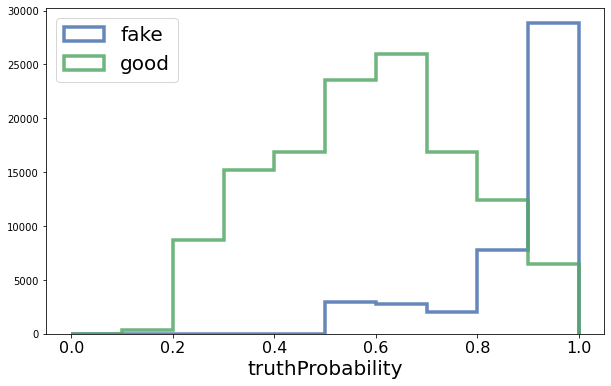

In [27]:
var = 'truthProbability'
stack = False

good_query = 'truthProbability >= 0.5 & linkValid == True'
fake_query = 'truthProbability < 0.5 | linkValid == False'
# Set an 'is_good' column for the full df
df['is_good'] = False
df['is_good'] = (df['truthProbability']>=0.5) & df['linkValid']
# Create slices for convenience
good = df.query(good_query)
fake = df.query(fake_query)


fig, ax = plt.subplots(1, 1,figsize=(10,6))

plot_options = {
    'histtype' : 'step',
    'linewidth' : 3.5, 
    'alpha' : 0.85, 
    'density' : None,
    'bins' : np.linspace(0,1,11)
}

fake_vals, bin_edges = np.histogram(fake[var], plot_options['bins'])
if not stack: fake_vals = None
good_vals = ax.hist(good[var], edgecolor='#4C72B0', bottom=fake_vals,  **plot_options)
fake_vals = ax.hist(fake[var], edgecolor='#55A868', **plot_options)
ax.legend(['fake', 'good'], loc='upper left', fontsize=20)
ax.set_xlabel(var, fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=16)

Now we can make some 2d correlation plots using seaborn's kernel density esimation feature

In [28]:
def plot_kde_2d(x_var, y_var, nentries=5000, xlim=[], ylim=[]):
    joint_axes = []
    sns.set(font_scale=2)
    for df, title in zip([good, fake], ['good', 'fake'] ):
        ax = sns.jointplot(x=x_var, y=y_var, data=df[0:nentries], kind="kde", height=10, color='darkgreen', xlim=xlim, ylim=ylim);
        ax.ax_marg_x.set_title(title)
        joint_axes.append(ax.ax_joint)
    return joint_axes

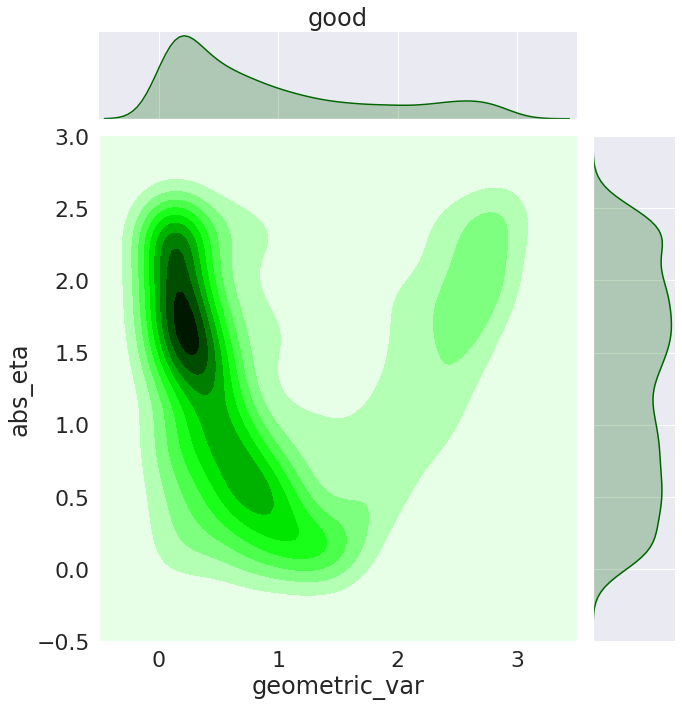

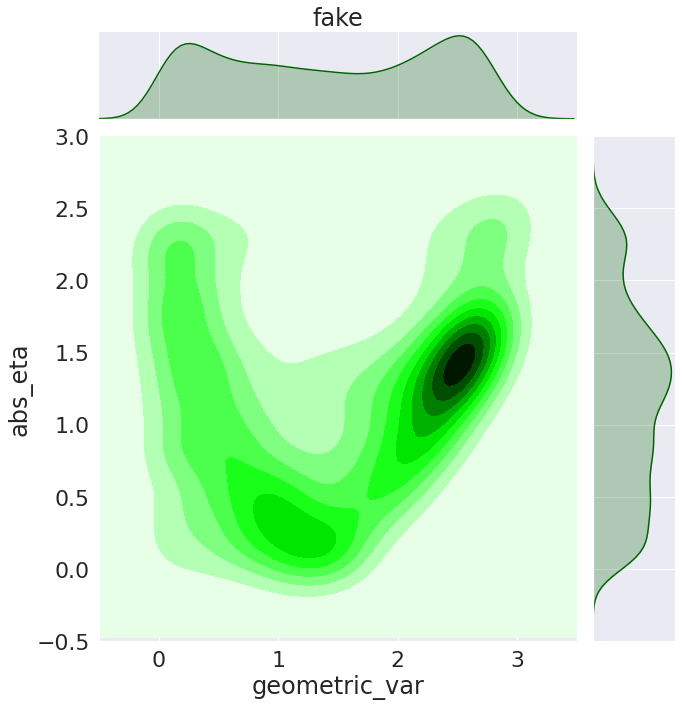

In [29]:
plot_kde_2d('geometric_var', 'abs_eta', nentries=5000, xlim=[-0.5,3.5], ylim=[-.5,3])

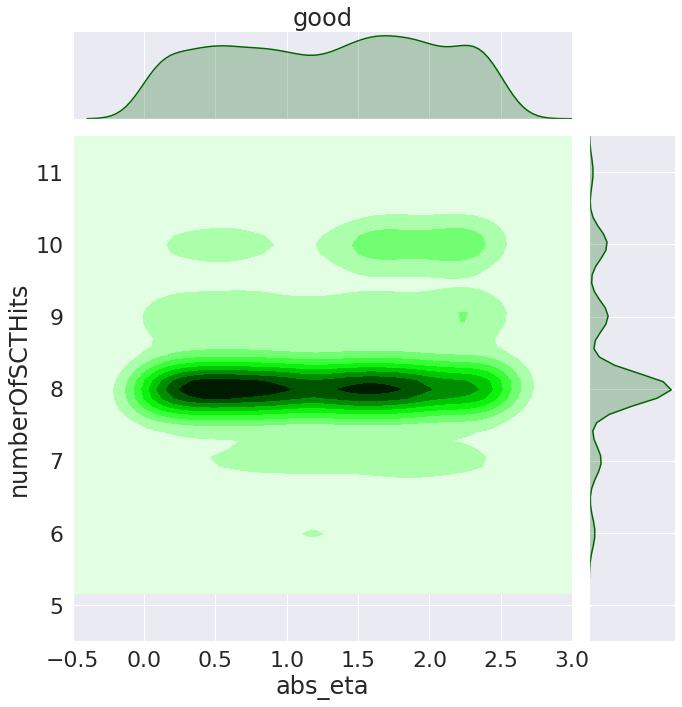

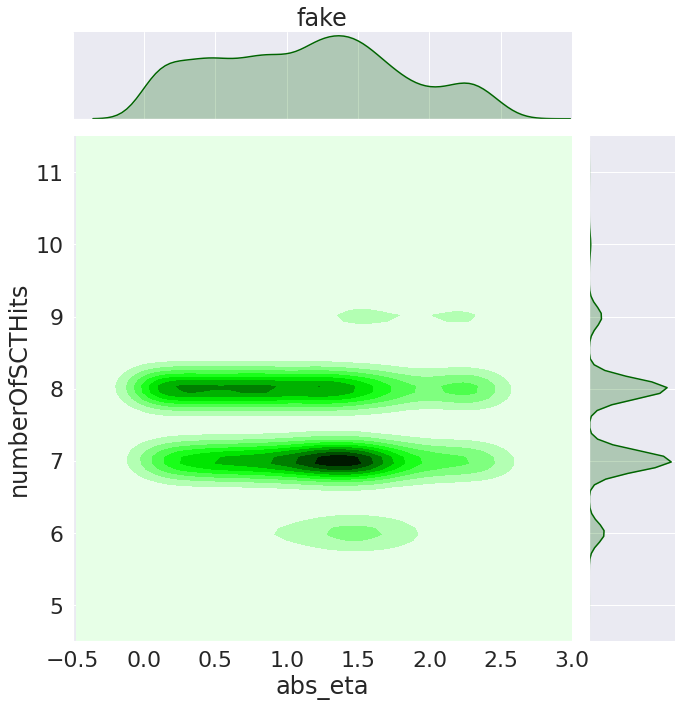

In [30]:
plot_kde_2d('abs_eta', 'numberOfSCTHits', nentries=5000, xlim=[-.5,3], ylim=[4.5,11.5])

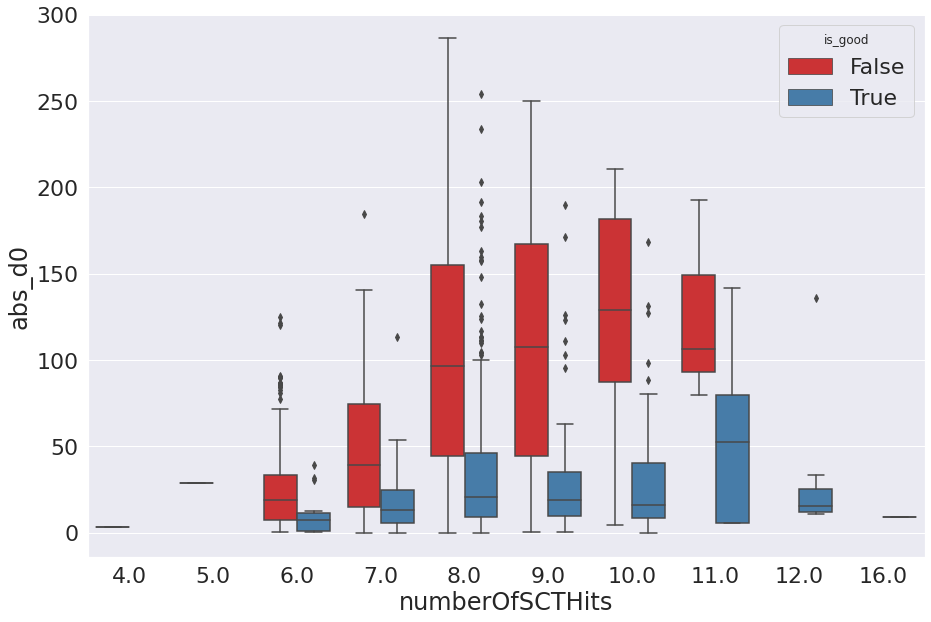

In [53]:
fig = plt.figure(figsize=[15,10])
ax = sns.boxplot(x='numberOfSCTHits', y='abs_d0', hue='is_good', data=df[0:5000], palette="Set1")

In [104]:
def plot2d(df, var_a, var_b, nentries=1000, bins=[10,10], title=''):
    fig = plt.figure(figsize=[15,10])
    h, xedges, yedges, image = plt.hist2d(x=df[0:nentries][var_a], y=df[0:nentries][var_b], bins=bins);
    ax = fig.gca()
    ax.set_xlabel(var_a, fontsize=30)
    ax.set_ylabel(var_b, fontsize=30)
    ax.set_title(title, fontsize=30)

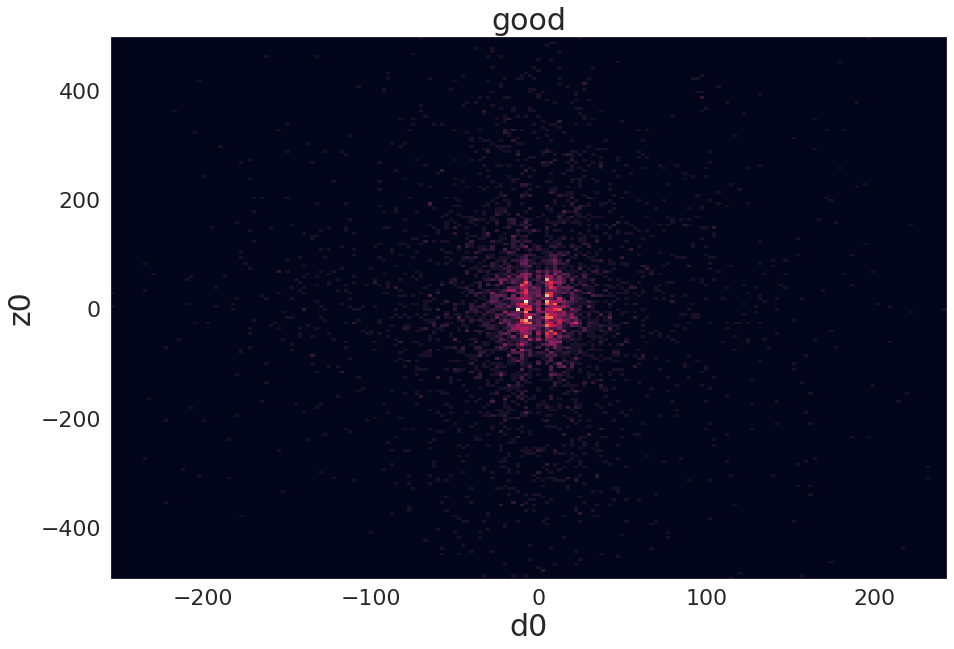

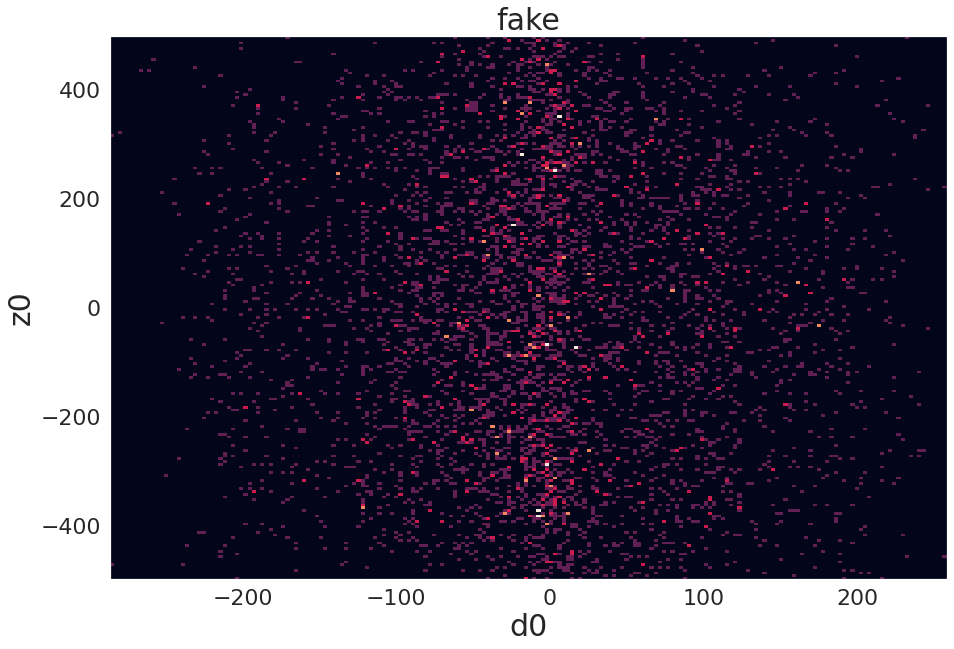

In [105]:
plot2d(good, 'd0', 'z0', 5000, [200,200], 'good')
plot2d(fake, 'd0', 'z0', 5000, [200,200], 'fake')

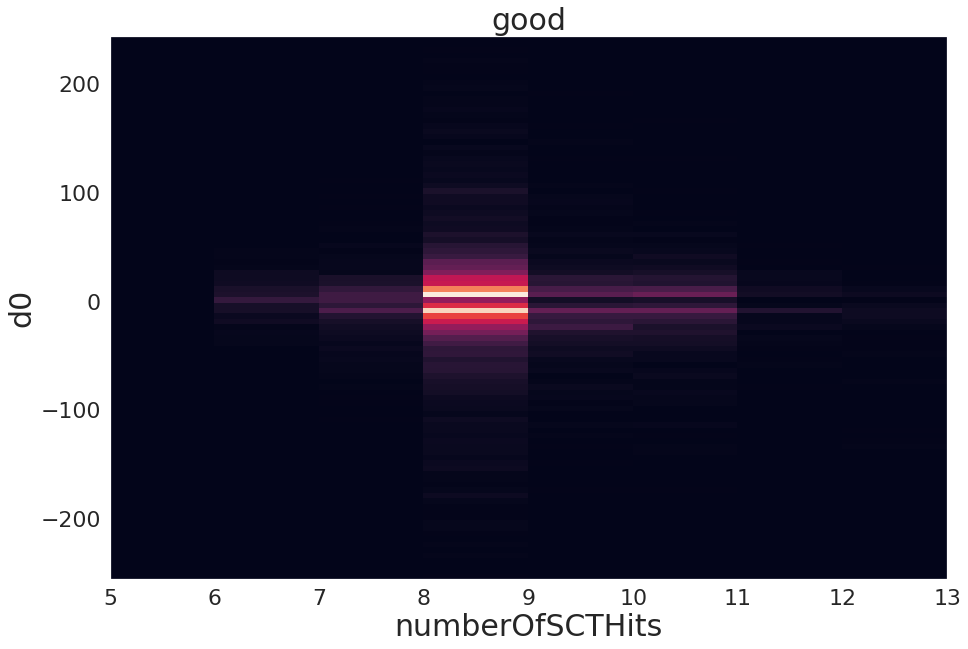

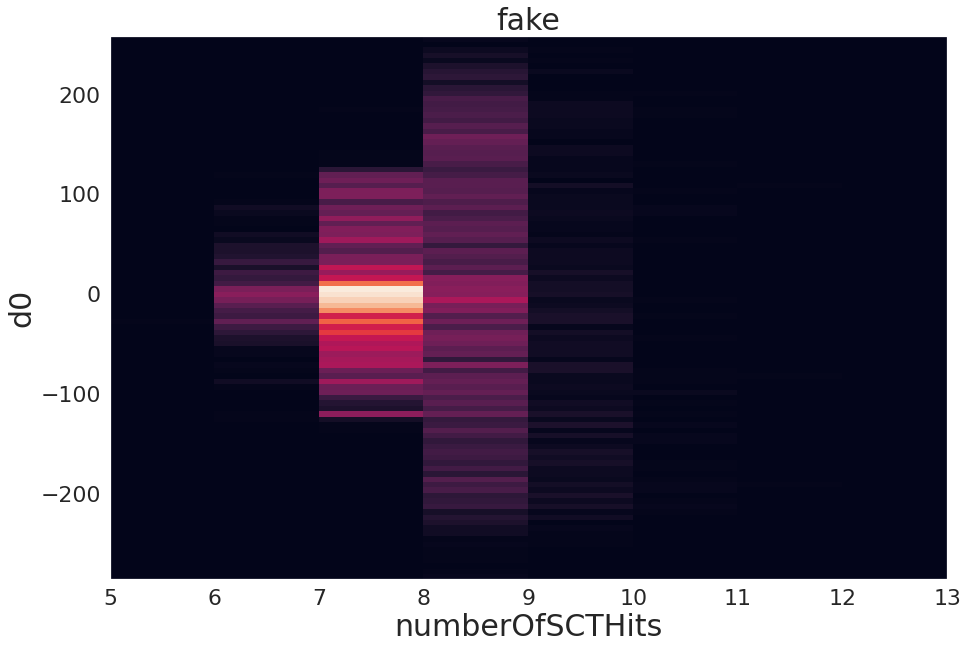

In [111]:
plot2d(good, 'numberOfSCTHits', 'd0', 5000, [[5,6,7,8,9,10,11,12,13],100], 'good')
plot2d(fake, 'numberOfSCTHits', 'd0', 5000, [[5,6,7,8,9,10,11,12,13],100], 'fake')

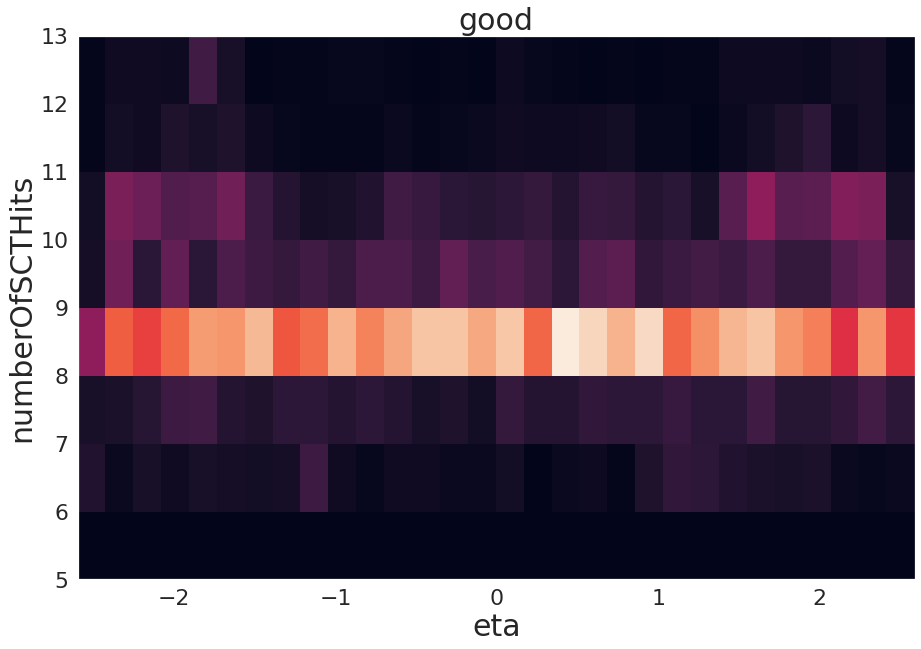

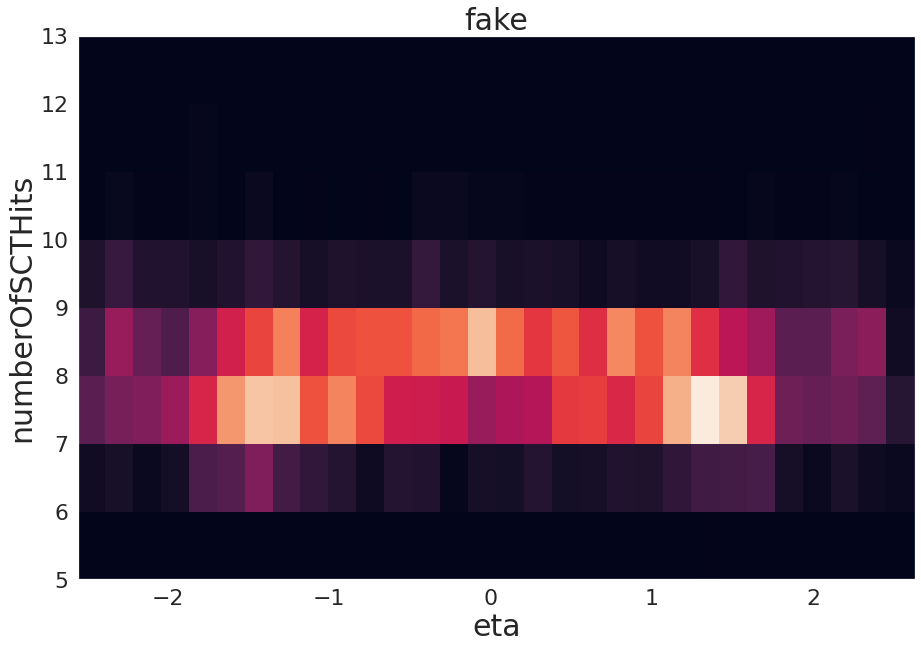

In [114]:
plot2d(good, 'eta', 'numberOfSCTHits', 5000, [30, [5,6,7,8,9,10,11,12,13]], 'good')
plot2d(fake, 'eta', 'numberOfSCTHits', 5000, [30, [5,6,7,8,9,10,11,12,13]], 'fake')

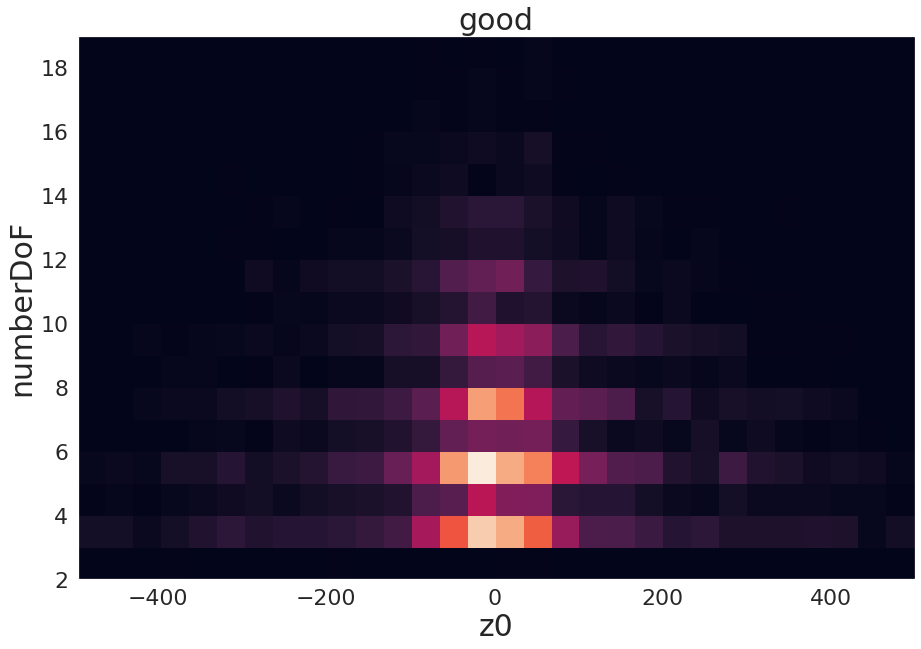

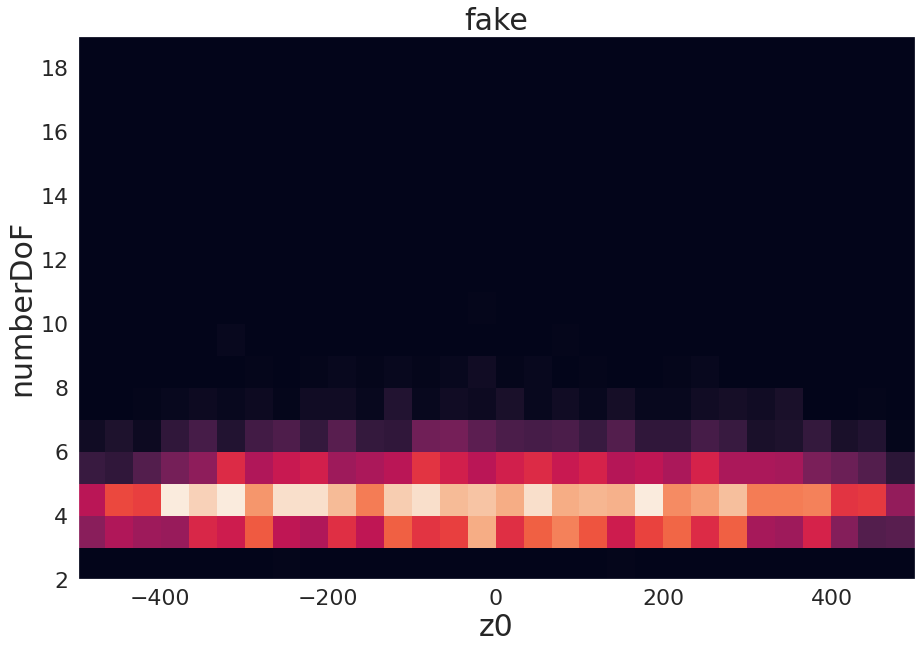

In [136]:
plot2d(good, 'z0', 'numberDoF', 5000, [30, np.arange(2,20)], 'good')
plot2d(fake, 'z0', 'numberDoF', 5000, [30, np.arange(2,20)], 'fake')

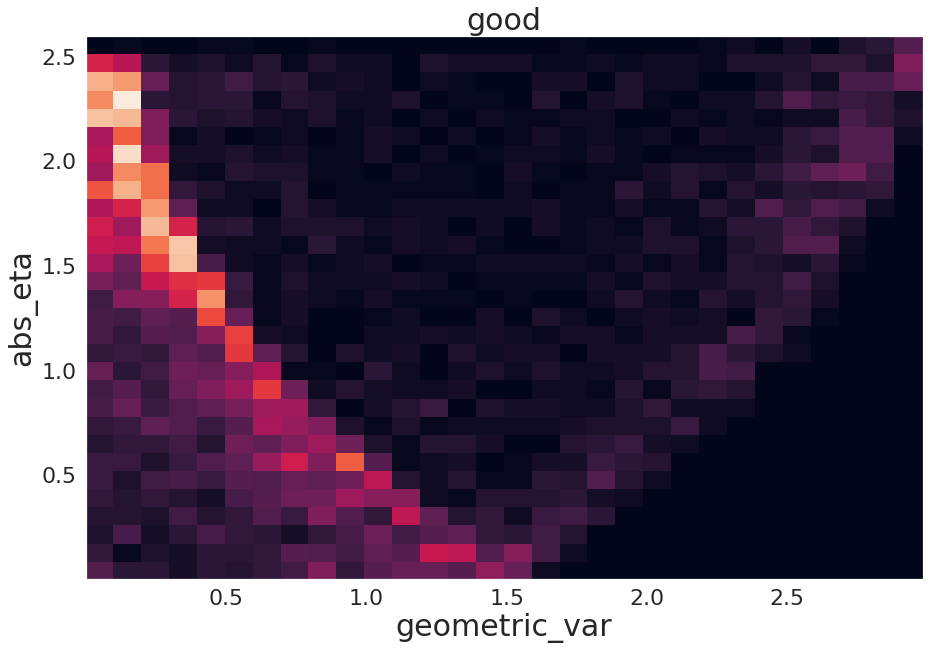

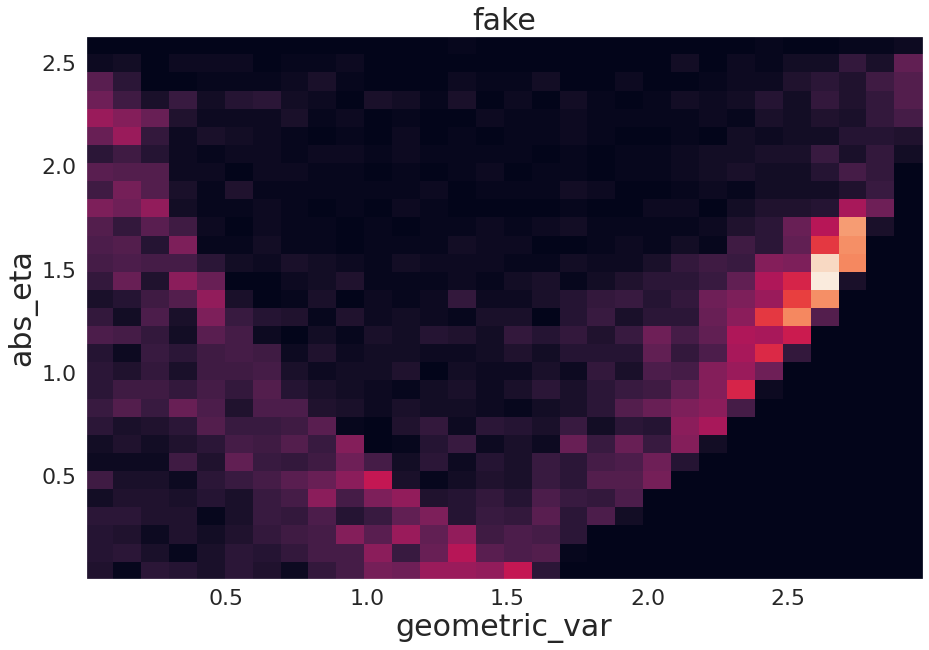

In [140]:
plot2d(good, 'geometric_var', 'abs_eta', 5000, [30, 30], 'good')
plot2d(fake, 'geometric_var', 'abs_eta', 5000, [30, 30], 'fake')

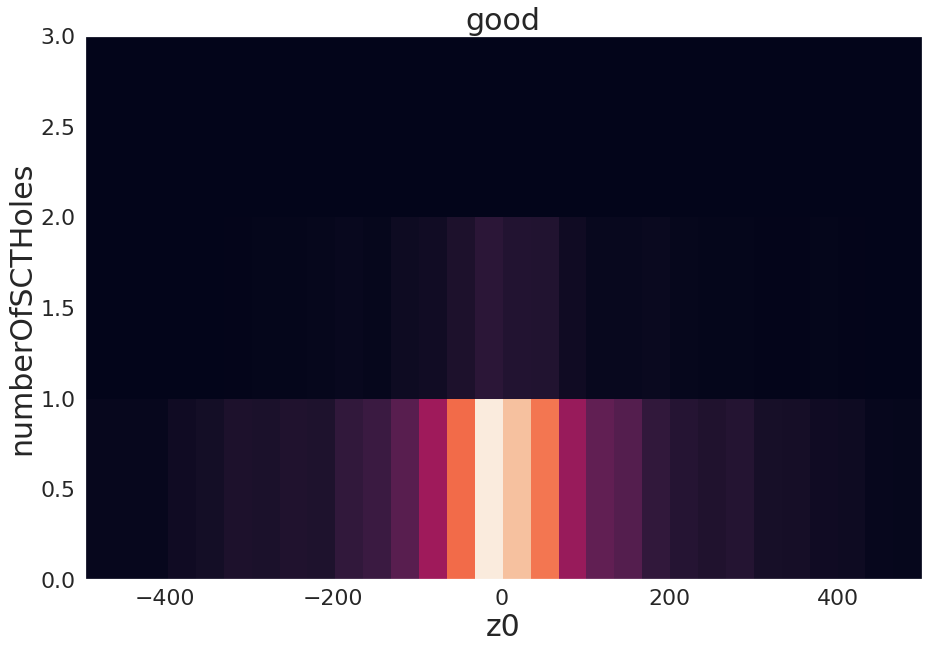

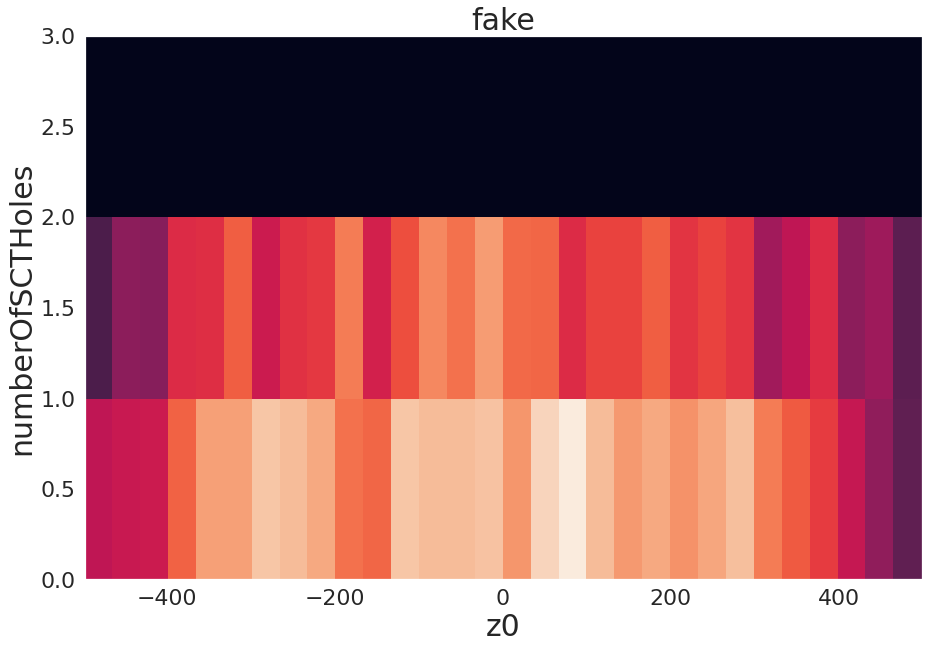

In [151]:
plot2d(good, 'z0', 'numberOfSCTHoles', 5000, [30, [0,1,2,3]], 'good')
plot2d(fake, 'z0', 'numberOfSCTHoles', 5000, [30, [0,1,2,3]], 'fake')
